## Training LGBM (Light Gradient Boosted Machine) Model

In this notebook, we will train the LGBM model on the file records that we had generated.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from scipy.sparse import load_npz
from time import time

In [ ]:
# project directory
current_dir = 'Home Credit_Kaggle'

# set the project folder as current working directory
import os
complete_path = os.path.join('/content/drive/My Drive/Colab Notebooks/',current_dir)
os.chdir(complete_path)

# create output folder for model if not already present
out_path_model = os.path.join(complete_path,'models')
if not os.path.isdir(out_path_model):
  os.mkdir(out_path_model)

In [ ]:
def conv_3D_to_2D(array_3D):
  # to convert 3D array of shape (batch_size,rows,columns)
  # to 2D array of shape (batch_size*rows,columns)
  batch_size = int(array_3D.shape[0])
  rows = int(array_3D.shape[1])
  cols = int(array_3D.shape[2])
  return array_3D.reshape(batch_size*rows,cols)
##==========end of conv_3D_to_2D===========##

In [ ]:
# load data of all batches
for i in range(1,8):  
  batch_path = "final_data/batch" + str(i) + "/"

  # load the data for the batch
  input1_numeric_values_batch = np.load(batch_path + "input1_numeric_values.npy")
  #input_size = int(input1_numeric_values_batch.shape[0]) 
  
  input1_categ_values_batch = load_npz(batch_path + "input1_categ_values_csr.npz").todense()
  #input1_categ_values_batch = conv_2D_to_3D_2(input1_categ_values_flat_batch,input_size)

  target_values_batch = np.load(batch_path + "target_values.npy")

  input2_numeric_values_batch = np.load(batch_path + "input2_numeric_values.npy")
  input2_numeric_values_batch = conv_3D_to_2D(input2_numeric_values_batch)
  
  input2_categ_values_batch = load_npz(batch_path + "input2_categ_values_csr.npz").todense()
  #input2_categ_values_batch = conv_2D_to_3D_2(input2_categ_values_flat_batch,input_size)

  input3_values_batch = load_npz(batch_path + "input3_values_csr.npz").todense()
  #input3_values_batch = conv_2D_to_3D_2(input3_values_flat_batch,input_size)

  input4_numeric_values_batch = np.load(batch_path + "input4_numeric_values.npy")
  input4_numeric_values_batch = conv_3D_to_2D(input4_numeric_values_batch)  
  
  input4_categ_values_batch = load_npz(batch_path + "input4_categ_values_csr.npz").todense()
  #input4_categ_values_batch = conv_2D_to_3D_2(input4_categ_values_flat_batch,input_size)

  input5_values_batch = np.load(batch_path + "input5_values.npy")
  input5_values_batch = conv_3D_to_2D(input5_values_batch)    
  
  input6_values_batch = np.load(batch_path + "input6_values.npy")
  input6_values_batch = conv_3D_to_2D(input6_values_batch)      

  input7_values_batch = load_npz(batch_path + "input7_values_csr.npz").todense()
  #input7_values_batch = conv_2D_to_3D_2(input7_values_flat_batch,input_size)

  if i == 1: # first batch
    input1_numeric_values = input1_numeric_values_batch
    input1_categ_values = input1_categ_values_batch

    target_values = target_values_batch

    input2_numeric_values = input2_numeric_values_batch
    input2_categ_values = input2_categ_values_batch

    input3_values = input3_values_batch

    input4_numeric_values = input4_numeric_values_batch
    input4_categ_values = input4_categ_values_batch

    input5_values = input5_values_batch
    input6_values = input6_values_batch
    input7_values = input7_values_batch

  else:
    # append the batch values
    input1_numeric_values = np.append(input1_numeric_values, input1_numeric_values_batch, axis = 0)
    input1_categ_values = np.append(input1_categ_values, input1_categ_values_batch, axis = 0)

    target_values = np.append(target_values, target_values_batch, axis = 0)

    input2_numeric_values = np.append(input2_numeric_values, input2_numeric_values_batch, axis = 0)
    input2_categ_values = np.append(input2_categ_values, input2_categ_values_batch, axis = 0)

    input3_values = np.append(input3_values, input3_values_batch, axis = 0)

    input4_numeric_values = np.append(input4_numeric_values, input4_numeric_values_batch, axis = 0)
    input4_categ_values = np.append(input4_categ_values, input4_categ_values_batch, axis = 0)

    input5_values = np.append(input5_values, input5_values_batch, axis = 0)
    input6_values = np.append(input6_values, input6_values_batch, axis = 0)
    input7_values = np.append(input7_values, input7_values_batch, axis = 0)
  ##==========end of if else block=================##
  print('Batch ' + str(i) + ' loaded')
##=================end of for loop====================##
input8_values = np.load("final_data_nn/input8_values_scaled.npy")
input8_values = conv_3D_to_2D(input8_values)
print('Engineered features loaded')

Batch 1 loaded
Batch 2 loaded
Batch 3 loaded
Batch 4 loaded
Batch 5 loaded
Batch 6 loaded
Batch 7 loaded
Engineered features loaded


In [ ]:
# size check
print(input1_numeric_values.shape)
print(input1_categ_values.shape)
print('='*120)
print(target_values.shape)
print('='*120)
print(input2_numeric_values.shape)
print(input2_categ_values.shape)
print('='*120)
print(input3_values.shape)
print('='*120)
print(input4_numeric_values.shape)
print(input4_categ_values.shape)
print('='*120)
print(input5_values.shape)
print('='*120)
print(input6_values.shape)
print('='*120)
print(input7_values.shape)
print('='*120)
print(input8_values.shape)
print('='*120)

(307511, 27)
(307511, 188)
(307511, 1)
(307511, 10)
(307511, 23)
(307511, 9)
(307511, 4)
(307511, 162)
(307511, 13)
(307511, 6)
(307511, 20)
(307511, 5)


In [ ]:
print(np.isnan(np.sum(input1_numeric_values)))
print(np.isnan(np.sum(input1_categ_values)))
print('='*120)
print(np.isnan(np.sum(target_values)))
print('='*120)
print(np.isnan(np.sum(input2_numeric_values)))
print(np.isnan(np.sum(input2_categ_values)))
print('='*120)
print(np.isnan(np.sum(input3_values)))
print('='*120)
print(np.isnan(np.sum(input4_numeric_values)))
print(np.isnan(np.sum(input4_categ_values)))
print('='*120)
print(np.isnan(np.sum(input5_values)))
print('='*120)
print(np.isnan(np.sum(input6_values)))
print('='*120)
print(np.isnan(np.sum(input7_values)))
print('='*120)
print(np.isnan(np.sum(input8_values)))
print('='*120)

False
False
False
False
False
False
False
False
False
False
False
False


In [ ]:
# create train and test datasets
X = np.hstack([input1_numeric_values,input1_categ_values,input2_numeric_values,
               input2_categ_values,input3_values,input4_numeric_values,
               input4_categ_values,input5_values,input6_values,input7_values,
               input8_values])
Y = target_values.reshape(-1,)

from sklearn.model_selection import train_test_split

X_train_cv,X_test,Y_train_cv,Y_test = train_test_split(X,Y,test_size=0.25,random_state=23,stratify=Y)
X_train,X_cv,Y_train,Y_cv = train_test_split(X_train_cv,Y_train_cv,test_size=0.25,random_state=23,stratify=Y_train_cv)

print(X_train.shape)
print(Y_train.shape)
print(X_cv.shape)
print(Y_cv.shape)
print(X_test.shape)
print(Y_test.shape)

(172974, 467)
(172974,)
(57659, 467)
(57659,)
(76878, 467)
(76878,)


In [ ]:
# initialize model and do cross validation on it
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV

# find class weight = no of samples for class 0/no of samples for class 1
classes,class_counts=np.unique(Y_train,return_counts = 1)
class_counts_neg,class_counts_pos = class_counts

# LGBM classifier
lgbm = LGBMClassifier(objective = 'binary', 
                   boosting_type = 'gbdt',device_type = 'cpu',
                   #scale_pos_weight = class_counts_neg/class_counts_pos,
                   class_weight = 'balanced',
                   random_state = 23)

# Parameter list
dict_param = {'n_estimators':[500,1000,2500,5000],
              'max_depth':[5,10,15],
              'num_leaves':[10,30,50,70],
              'learning_rate':[1e-4,1e-3,1e-2,1e-1],
              'subsample':[0.5,0.75,1],
              'colsample_bytree':[0.5,0.75,1],
              'reg_lambda':[0.5,0.75,1],
              'reg_alpha':[0.25,0.5]}

s = time()
# Random Validation
lgbm_rand_cv = RandomizedSearchCV(lgbm,dict_param,n_iter=20,scoring='roc_auc',cv=2,verbose=10,n_jobs=1)
lgbm_rand_cv.fit(X_train_cv,Y_train_cv)
print('\nTotal Time taken in seconds ', time() - s)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV] subsample=0.5, reg_lambda=0.5, reg_alpha=0.5, num_leaves=50, n_estimators=5000, max_depth=10, learning_rate=0.001, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.5, reg_lambda=0.5, reg_alpha=0.5, num_leaves=50, n_estimators=5000, max_depth=10, learning_rate=0.001, colsample_bytree=0.5, score=0.769, total=10.5min
[CV] subsample=0.5, reg_lambda=0.5, reg_alpha=0.5, num_leaves=50, n_estimators=5000, max_depth=10, learning_rate=0.001, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 10.5min remaining:    0.0s


[CV]  subsample=0.5, reg_lambda=0.5, reg_alpha=0.5, num_leaves=50, n_estimators=5000, max_depth=10, learning_rate=0.001, colsample_bytree=0.5, score=0.767, total=10.4min
[CV] subsample=0.75, reg_lambda=0.5, reg_alpha=0.25, num_leaves=30, n_estimators=5000, max_depth=15, learning_rate=0.01, colsample_bytree=0.75 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 20.9min remaining:    0.0s


[CV]  subsample=0.75, reg_lambda=0.5, reg_alpha=0.25, num_leaves=30, n_estimators=5000, max_depth=15, learning_rate=0.01, colsample_bytree=0.75, score=0.765, total= 7.4min
[CV] subsample=0.75, reg_lambda=0.5, reg_alpha=0.25, num_leaves=30, n_estimators=5000, max_depth=15, learning_rate=0.01, colsample_bytree=0.75 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 28.4min remaining:    0.0s


[CV]  subsample=0.75, reg_lambda=0.5, reg_alpha=0.25, num_leaves=30, n_estimators=5000, max_depth=15, learning_rate=0.01, colsample_bytree=0.75, score=0.764, total= 7.5min
[CV] subsample=1, reg_lambda=0.75, reg_alpha=0.25, num_leaves=50, n_estimators=1000, max_depth=15, learning_rate=0.001, colsample_bytree=1 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 35.8min remaining:    0.0s


[CV]  subsample=1, reg_lambda=0.75, reg_alpha=0.25, num_leaves=50, n_estimators=1000, max_depth=15, learning_rate=0.001, colsample_bytree=1, score=0.743, total= 3.9min
[CV] subsample=1, reg_lambda=0.75, reg_alpha=0.25, num_leaves=50, n_estimators=1000, max_depth=15, learning_rate=0.001, colsample_bytree=1 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 39.7min remaining:    0.0s


[CV]  subsample=1, reg_lambda=0.75, reg_alpha=0.25, num_leaves=50, n_estimators=1000, max_depth=15, learning_rate=0.001, colsample_bytree=1, score=0.743, total= 3.9min
[CV] subsample=0.75, reg_lambda=0.75, reg_alpha=0.5, num_leaves=50, n_estimators=2500, max_depth=15, learning_rate=0.1, colsample_bytree=0.75 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 43.6min remaining:    0.0s


[CV]  subsample=0.75, reg_lambda=0.75, reg_alpha=0.5, num_leaves=50, n_estimators=2500, max_depth=15, learning_rate=0.1, colsample_bytree=0.75, score=0.739, total= 4.0min
[CV] subsample=0.75, reg_lambda=0.75, reg_alpha=0.5, num_leaves=50, n_estimators=2500, max_depth=15, learning_rate=0.1, colsample_bytree=0.75 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 47.6min remaining:    0.0s


[CV]  subsample=0.75, reg_lambda=0.75, reg_alpha=0.5, num_leaves=50, n_estimators=2500, max_depth=15, learning_rate=0.1, colsample_bytree=0.75, score=0.738, total= 4.0min
[CV] subsample=0.75, reg_lambda=1, reg_alpha=0.5, num_leaves=10, n_estimators=5000, max_depth=5, learning_rate=0.001, colsample_bytree=1 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 51.6min remaining:    0.0s


[CV]  subsample=0.75, reg_lambda=1, reg_alpha=0.5, num_leaves=10, n_estimators=5000, max_depth=5, learning_rate=0.001, colsample_bytree=1, score=0.760, total= 9.2min
[CV] subsample=0.75, reg_lambda=1, reg_alpha=0.5, num_leaves=10, n_estimators=5000, max_depth=5, learning_rate=0.001, colsample_bytree=1 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 60.7min remaining:    0.0s


[CV]  subsample=0.75, reg_lambda=1, reg_alpha=0.5, num_leaves=10, n_estimators=5000, max_depth=5, learning_rate=0.001, colsample_bytree=1, score=0.758, total= 8.8min
[CV] subsample=0.5, reg_lambda=1, reg_alpha=0.5, num_leaves=50, n_estimators=500, max_depth=10, learning_rate=0.001, colsample_bytree=0.75 
[CV]  subsample=0.5, reg_lambda=1, reg_alpha=0.5, num_leaves=50, n_estimators=500, max_depth=10, learning_rate=0.001, colsample_bytree=0.75, score=0.746, total= 1.6min
[CV] subsample=0.5, reg_lambda=1, reg_alpha=0.5, num_leaves=50, n_estimators=500, max_depth=10, learning_rate=0.001, colsample_bytree=0.75 
[CV]  subsample=0.5, reg_lambda=1, reg_alpha=0.5, num_leaves=50, n_estimators=500, max_depth=10, learning_rate=0.001, colsample_bytree=0.75, score=0.744, total= 1.5min
[CV] subsample=0.5, reg_lambda=0.75, reg_alpha=0.5, num_leaves=50, n_estimators=2500, max_depth=15, learning_rate=0.01, colsample_bytree=0.5 
[CV]  subsample=0.5, reg_lambda=0.75, reg_alpha=0.5, num_leaves=50, n_estima

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 178.4min finished



Total Time taken in seconds  11114.781212806702


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

# find class weight = no of samples for class 0/no of samples for class 1
#classes,class_counts=np.unique(Y_train,return_counts = True)
#class_counts_neg,class_counts_pos = class_counts

# LGBM classifier
lgbm = LGBMClassifier(objective = 'binary',
                   boosting_type = 'gbdt',device_type = 'cpu',
                   #scale_pos_weight = class_counts_neg/class_counts_pos,
                   class_weight = 'balanced',
                   random_state = 23)

# Parameter list
dict_param = {'n_estimators':[2500,5000],
              'max_depth':[5,10,15],
              'num_leaves':[30],
              'learning_rate':[1e-2],
              'subsample':[0.75],
              'colsample_bytree':[0.5],
              'reg_lambda':[0.75],
              'reg_alpha':[0.5]}

s = time()
# Grid Validation
lgbm_gc_cv = GridSearchCV(lgbm,dict_param,scoring='roc_auc',cv=2,verbose=10,n_jobs=1)
lgbm_gc_cv.fit(X_train_cv,Y_train_cv)
print('\nTotal Time taken in seconds ', time() - s)

# store results of cross validation
lgbm_cv_results = pd.DataFrame(lgbm_gc_cv.cv_results_)
#print(lgbm_cv_results.columns)

# fit on train data and predict
#print('Fitting the model...')
#s = time()
#lgbm.fit(X_train,Y_train)
#print('Model fitted in ',time() - s,' seconds')
# predicted probabilities for only class 1
#Y_train_proba = lgbm.predict_proba(X_train)[:,1].reshape(-1,)
#Y_cv_proba = lgbm.predict_proba(X_cv)[:,1].reshape(-1,)
#predicted class labels
#Y_train_predict = lgbm.predict(X_train)
#Y_cv_predict = lgbm.predict(X_cv)

# calculate AUC score for train and test data
#from sklearn.metrics import roc_auc_score
#train_auc = roc_auc_score(Y_train,Y_train_proba)
#cv_auc = roc_auc_score(Y_cv,Y_cv_proba)

#print('Train AUC: ',train_auc)
#print('CV AUC: ',cv_auc)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=2500, num_leaves=30, reg_alpha=0.5, reg_lambda=0.75, subsample=0.75 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=2500, num_leaves=30, reg_alpha=0.5, reg_lambda=0.75, subsample=0.75, score=0.772, total= 2.8min
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=2500, num_leaves=30, reg_alpha=0.5, reg_lambda=0.75, subsample=0.75 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.8min remaining:    0.0s


[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=2500, num_leaves=30, reg_alpha=0.5, reg_lambda=0.75, subsample=0.75, score=0.770, total= 2.8min
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=5000, num_leaves=30, reg_alpha=0.5, reg_lambda=0.75, subsample=0.75 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  5.6min remaining:    0.0s


[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=5000, num_leaves=30, reg_alpha=0.5, reg_lambda=0.75, subsample=0.75, score=0.769, total= 5.2min
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=5000, num_leaves=30, reg_alpha=0.5, reg_lambda=0.75, subsample=0.75 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 10.9min remaining:    0.0s


[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=5000, num_leaves=30, reg_alpha=0.5, reg_lambda=0.75, subsample=0.75, score=0.766, total= 5.1min
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=2500, num_leaves=30, reg_alpha=0.5, reg_lambda=0.75, subsample=0.75 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 16.0min remaining:    0.0s


[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=2500, num_leaves=30, reg_alpha=0.5, reg_lambda=0.75, subsample=0.75, score=0.772, total= 3.4min
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=2500, num_leaves=30, reg_alpha=0.5, reg_lambda=0.75, subsample=0.75 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 19.4min remaining:    0.0s


[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=2500, num_leaves=30, reg_alpha=0.5, reg_lambda=0.75, subsample=0.75, score=0.770, total= 3.4min
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=5000, num_leaves=30, reg_alpha=0.5, reg_lambda=0.75, subsample=0.75 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 22.8min remaining:    0.0s


[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=5000, num_leaves=30, reg_alpha=0.5, reg_lambda=0.75, subsample=0.75, score=0.768, total= 5.9min
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=5000, num_leaves=30, reg_alpha=0.5, reg_lambda=0.75, subsample=0.75 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 28.7min remaining:    0.0s


[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=5000, num_leaves=30, reg_alpha=0.5, reg_lambda=0.75, subsample=0.75, score=0.766, total= 5.9min
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=15, n_estimators=2500, num_leaves=30, reg_alpha=0.5, reg_lambda=0.75, subsample=0.75 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 34.6min remaining:    0.0s


[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=15, n_estimators=2500, num_leaves=30, reg_alpha=0.5, reg_lambda=0.75, subsample=0.75, score=0.772, total= 3.4min
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=15, n_estimators=2500, num_leaves=30, reg_alpha=0.5, reg_lambda=0.75, subsample=0.75 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 38.0min remaining:    0.0s


[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=15, n_estimators=2500, num_leaves=30, reg_alpha=0.5, reg_lambda=0.75, subsample=0.75, score=0.770, total= 3.4min
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=15, n_estimators=5000, num_leaves=30, reg_alpha=0.5, reg_lambda=0.75, subsample=0.75 
[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=15, n_estimators=5000, num_leaves=30, reg_alpha=0.5, reg_lambda=0.75, subsample=0.75, score=0.768, total= 5.9min
[CV] colsample_bytree=0.5, learning_rate=0.01, max_depth=15, n_estimators=5000, num_leaves=30, reg_alpha=0.5, reg_lambda=0.75, subsample=0.75 
[CV]  colsample_bytree=0.5, learning_rate=0.01, max_depth=15, n_estimators=5000, num_leaves=30, reg_alpha=0.5, reg_lambda=0.75, subsample=0.75, score=0.766, total= 5.9min


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 53.1min finished



Total Time taken in seconds  3549.072637319565


In [ ]:
# get best value of hyperparameters
n_estimators_best = int(lgbm_cv_results[lgbm_cv_results['rank_test_score']==1]['param_n_estimators'].values)
print('Best No of Estimators value :', n_estimators_best)
max_depth_best = int(lgbm_cv_results[lgbm_cv_results['rank_test_score']==1]['param_max_depth'].values)
print('Best Max Depth value :', max_depth_best)
num_leaves_best = int(lgbm_cv_results[lgbm_cv_results['rank_test_score']==1]['param_num_leaves'].values)
print('Best Num Leaves value :', num_leaves_best)
learning_rate_best = float(lgbm_cv_results[lgbm_cv_results['rank_test_score']==1]['param_learning_rate'].values)
print('Best Learning Rate value :', learning_rate_best)
subsample_best = float(lgbm_cv_results[lgbm_cv_results['rank_test_score']==1]['param_subsample'].values)
print('Best Subsample value :', subsample_best)
colsample_bytree_best = float(lgbm_cv_results[lgbm_cv_results['rank_test_score']==1]['param_colsample_bytree'].values)
print('Best Colsample bytree value :', colsample_bytree_best)
reg_lambda_best = float(lgbm_cv_results[lgbm_cv_results['rank_test_score']==1]['param_reg_lambda'].values)
print('Best Reg Lambda value :', reg_lambda_best)
reg_alpha_best = float(lgbm_cv_results[lgbm_cv_results['rank_test_score']==1]['param_reg_alpha'].values)
print('Best Reg Alpha value :', reg_alpha_best)

# Best config LGBM classifier
lgbm_best = LGBMClassifier(objective = 'binary',
                           boosting_type = 'gbdt',device_type = 'cpu',
                           #scale_pos_weight = class_counts_neg/class_counts_pos,
                           #class_weight = 'balanced',
                           random_state = 23,
                           n_estimators = n_estimators_best,max_depth = max_depth_best,
                           num_leaves = num_leaves_best,learning_rate = learning_rate_best,
                           subsample = subsample_best,colsample_bytree = colsample_bytree_best,
                           reg_lambda = reg_lambda_best,reg_alpha = reg_alpha_best)

Best No of Estimators value : 2500
Best Max Depth value : 15
Best Num Leaves value : 30
Best Learning Rate value : 0.01
Best Subsample value : 0.75
Best Colsample bytree value : 0.5
Best Reg Lambda value : 0.75
Best Reg Alpha value : 0.5


In [ ]:
from lightgbm import LGBMClassifier
lgbm_best = LGBMClassifier(objective = 'binary',
                           boosting_type = 'gbdt',device_type = 'cpu',
                           #scale_pos_weight = class_counts_neg/class_counts_pos,
                           #class_weight = 'balanced',
                           random_state = 23,
                           n_estimators = 2500,max_depth = 15,
                           num_leaves = 30,learning_rate = 0.01,
                           subsample = 0.75,colsample_bytree = 0.5,
                           reg_lambda = 0.75,reg_alpha = 0.5)

###Function to plot confustion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divide each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    #labels = [1,2,3,4,5,6,7,8,9]
    labels = [0,1]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(4,3))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(4,3))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(4,3))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

Fitting the model...
Model fitted in  281.6443934440613  seconds

Train Data Confusion Matrix + Precision Matrix + Recall Matrix
Number of misclassified points  7.567611317307804
-------------------------------------------------- Confusion matrix --------------------------------------------------


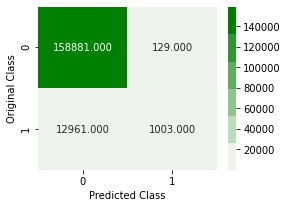

-------------------------------------------------- Precision matrix --------------------------------------------------


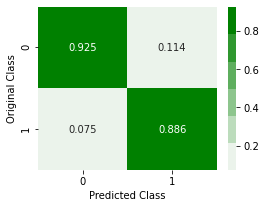

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


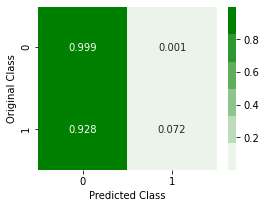

Sum of rows in precision matrix [1. 1.]
Train Data AUC score:  0.8811332976379144
************************************************************************************************************************

Test Data Confusion Matrix + Precision Matrix + Recall Matrix
Number of misclassified points  8.05171830692786
-------------------------------------------------- Confusion matrix --------------------------------------------------


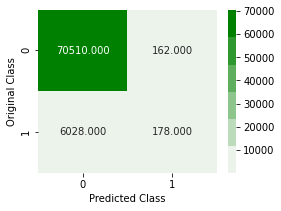

-------------------------------------------------- Precision matrix --------------------------------------------------


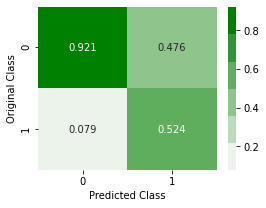

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


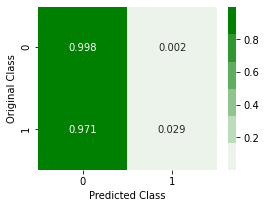

Sum of rows in precision matrix [1. 1.]
Test Data AUC score:  0.7704650041248506


In [ ]:
# fit best model on train data and predict
print('Fitting the model...')
s = time()
lgbm_best.fit(X_train,Y_train)
print('Model fitted in ',time() - s,' seconds')
# predicted probabilities for only class 1
Y_train_proba = lgbm_best.predict_proba(X_train)[:,1].reshape(-1,)
Y_test_proba = lgbm_best.predict_proba(X_test)[:,1].reshape(-1,)
#predicted class labels
Y_train_predict = lgbm_best.predict(X_train)
Y_test_predict = lgbm_best.predict(X_test)

# calculate AUC score for train and test data
from sklearn.metrics import roc_auc_score
train_auc = roc_auc_score(Y_train,Y_train_proba)
test_auc = roc_auc_score(Y_test,Y_test_proba)

# print auc score and confusion matrix
print('\nTrain Data Confusion Matrix + Precision Matrix + Recall Matrix')
print('='*120)
plot_confusion_matrix(Y_train, Y_train_predict)
print('Train Data AUC score: ',train_auc)

print('*'*120)

print('\nTest Data Confusion Matrix + Precision Matrix + Recall Matrix')
print('='*120)
plot_confusion_matrix(Y_test, Y_test_predict)
print('Test Data AUC score: ',test_auc)

##Caliberated Classifier

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

sig_lgbm = CalibratedClassifierCV(lgbm_best, method='sigmoid')

Fitting the model...
Model fitted in  1144.7984755039215  seconds

Train Data Confusion Matrix + Precision Matrix + Recall Matrix
Number of misclassified points  7.188363569091309
-------------------------------------------------- Confusion matrix --------------------------------------------------


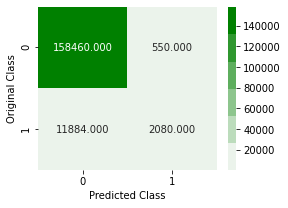

-------------------------------------------------- Precision matrix --------------------------------------------------


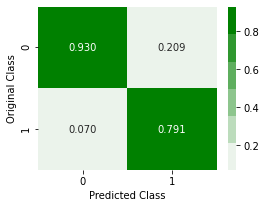

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


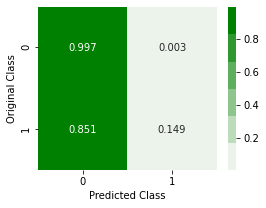

Sum of rows in precision matrix [1. 1.]
Train Data AUC score:  0.888382226491613
************************************************************************************************************************

Test Data Confusion Matrix + Precision Matrix + Recall Matrix
Number of misclassified points  8.073831265121362
-------------------------------------------------- Confusion matrix --------------------------------------------------


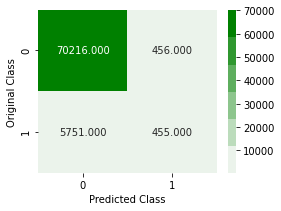

-------------------------------------------------- Precision matrix --------------------------------------------------


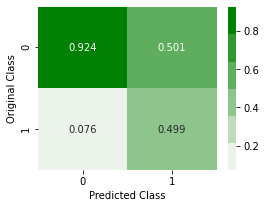

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


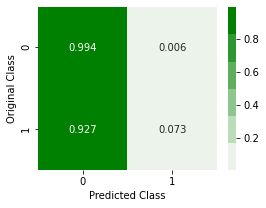

Sum of rows in precision matrix [1. 1.]
Test Data AUC score:  0.7713121270278873


In [ ]:
# fit best model on train data and predict
print('Fitting the model...')
s = time()
sig_lgbm.fit(X_train,Y_train)
print('Model fitted in ',time() - s,' seconds')
# predicted probabilities for only class 1
Y_train_proba = sig_lgbm.predict_proba(X_train)[:,1].reshape(-1,)
Y_test_proba = sig_lgbm.predict_proba(X_test)[:,1].reshape(-1,)
#predicted class labels
Y_train_predict = sig_lgbm.predict(X_train)
Y_test_predict = sig_lgbm.predict(X_test)

# calculate AUC score for train and test data
from sklearn.metrics import roc_auc_score
train_auc = roc_auc_score(Y_train,Y_train_proba)
test_auc = roc_auc_score(Y_test,Y_test_proba)

# print auc score and confusion matrix
print('\nTrain Data Confusion Matrix + Precision Matrix + Recall Matrix')
print('='*120)
plot_confusion_matrix(Y_train, Y_train_predict)
print('Train Data AUC score: ',train_auc)

print('*'*120)

print('\nTest Data Confusion Matrix + Precision Matrix + Recall Matrix')
print('='*120)
plot_confusion_matrix(Y_test, Y_test_predict)
print('Test Data AUC score: ',test_auc)

In [ ]:
# save the model
import pickle
f = open('models/lgbm_model','wb')
#pickle.dump(lgbm_best,f)
pickle.dump(sig_lgbm,f)
f.close()